<h1>Abstract data understanding and Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def countDistinctValues(df, columnsList=None):
    if not columnsList:
        columnsList=list(df.columns)
    distinctValuesDict={}
    for column in columnsList:
        try:
            distinctValuesDict[column]=len(set(df[str(column)]))
        except:
            print("the column {} doesn't belong to the dataframe provided".format(column))
            pass
    return distinctValuesDict

<h3>London Crimes by LSOA

In [2]:
bigData=pd.read_csv('data/london_crime_by_lsoa.csv')

In [3]:
bigData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
lsoa_code         object
borough           object
major_category    object
minor_category    object
value             int64
year              int64
month             int64
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
print("Number of records : {}".format(len(bigData)))
print("Number of missing values: \n{}".format(bigData.isnull().sum()))

Number of records : 13490604
Number of missing values: 
lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64


In [5]:
bigData.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
print("number of borough: {}".format(len(set(bigData.borough))))
print("number of major categories: {}".format(len(set(bigData.major_category))))
print("number of minor categories: {}".format(len(set(bigData.minor_category))))
print("the record is between {} and {}".format(min(bigData.year), max(bigData.year)))

number of borough: 33
number of major categories: 9
number of minor categories: 32
the record is between 2008 and 2016


In [7]:
bigData=bigData[~bigData.value.isin([0])] #Drop all the rows with value (number of crimes) equal to 0

In [8]:
print("It now contains {} records after dropping the zero crime rows.".format(len(bigData)))

It now contains 3419099 records after dropping the zero crime rows.


In [9]:
crimeCountByCategory = bigData.groupby(['major_category', 'minor_category']).size().reset_index(name='counts').sort_values('counts',ascending=False)
crimeCountByMajorCategory = bigData.groupby(['major_category']).size().reset_index(name='counts').sort_values('counts',ascending=False)

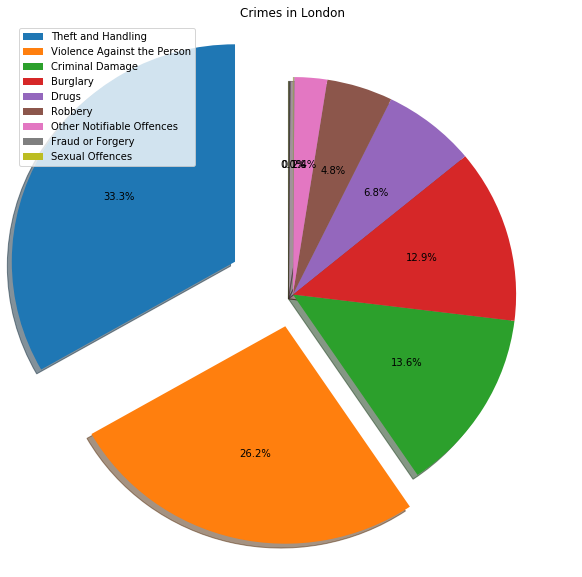

In [10]:
labels = crimeCountByMajorCategory['major_category']
values = crimeCountByMajorCategory['counts']

explode = (0.3, 0.15, 0.0, 0.0, 0.0,0.0,0.0,0.0, 0.0)


plt.figure(figsize=(10,10))
plt.title('Crimes in London')
plt.pie(values, explode = explode, labels=None, autopct='%1.1f%%', shadow=True, startangle= 90)
plt.legend(loc=0, labels=labels)
plt.show()

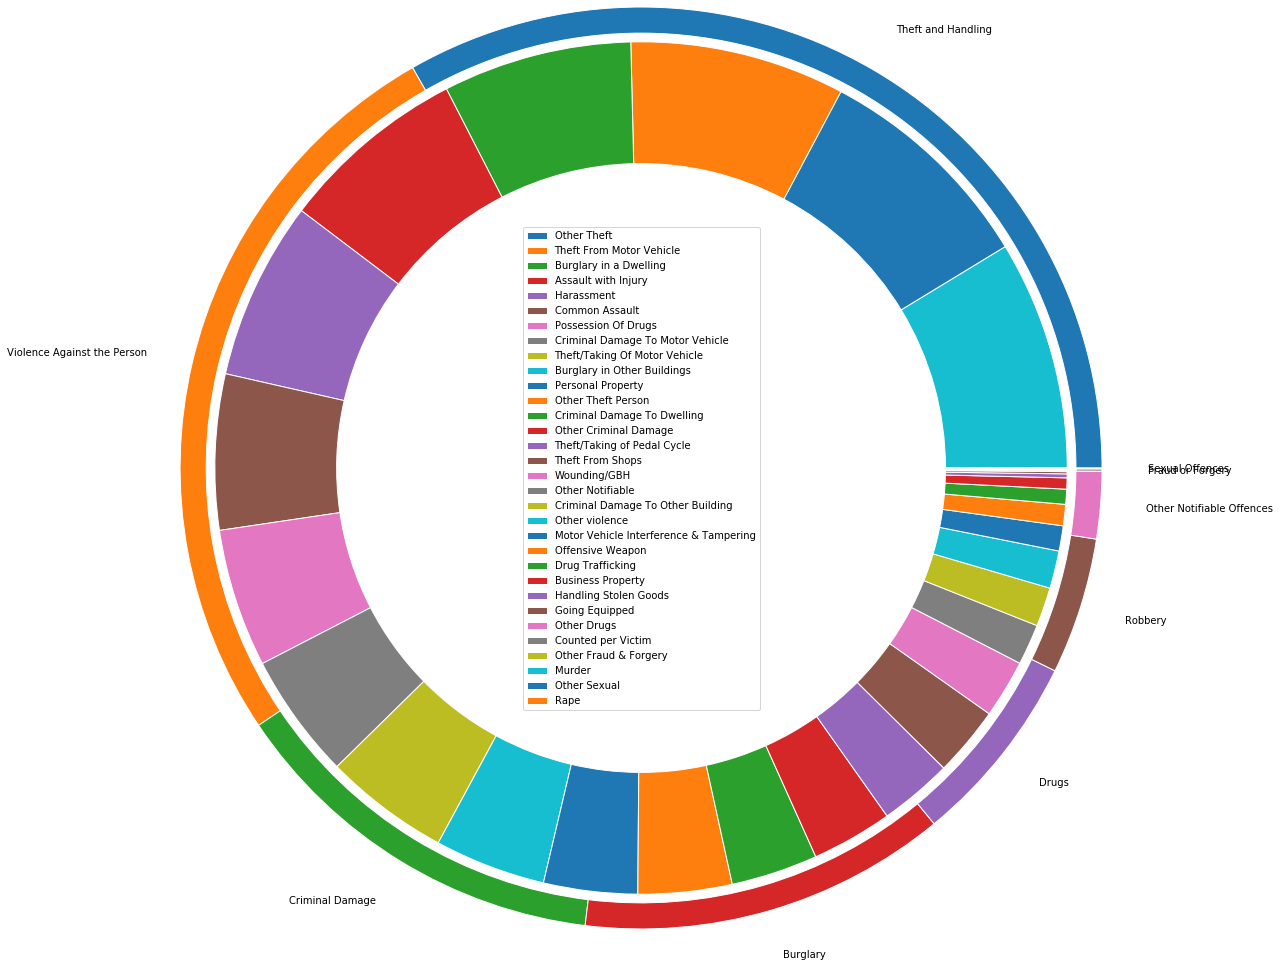

In [11]:
majorCategoryNames=crimeCountByMajorCategory['major_category']
majorCategoryCounts=crimeCountByMajorCategory['counts']

minorCategoryNames=crimeCountByCategory['minor_category']
minorCategoryCounts=crimeCountByCategory['counts']

fig, ax = plt.subplots()
ax.axis('equal')
# explode = (0.15, 0.15, 0.1, 0.1, 0.1,0.1,0.1,0.1, 0.1)
majorCategory, _ = ax.pie(majorCategoryCounts, radius=5.3, labels=majorCategoryNames)
plt.setp( majorCategory, width=0.3, edgecolor='white')

minorCategory, _ = ax.pie(minorCategoryCounts, radius=5.0-0.1)
plt.setp( minorCategory, width=1.4, edgecolor='white')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.margins(0,0)
plt.legend(loc=10, labels=minorCategoryNames) 
plt.figure(figsize=(70,70))

<h3>Crimes by places(borough)

In [12]:
crimeCountByBorough = bigData.groupby(['borough']).size().reset_index(name='counts').sort_values('counts',ascending=False)

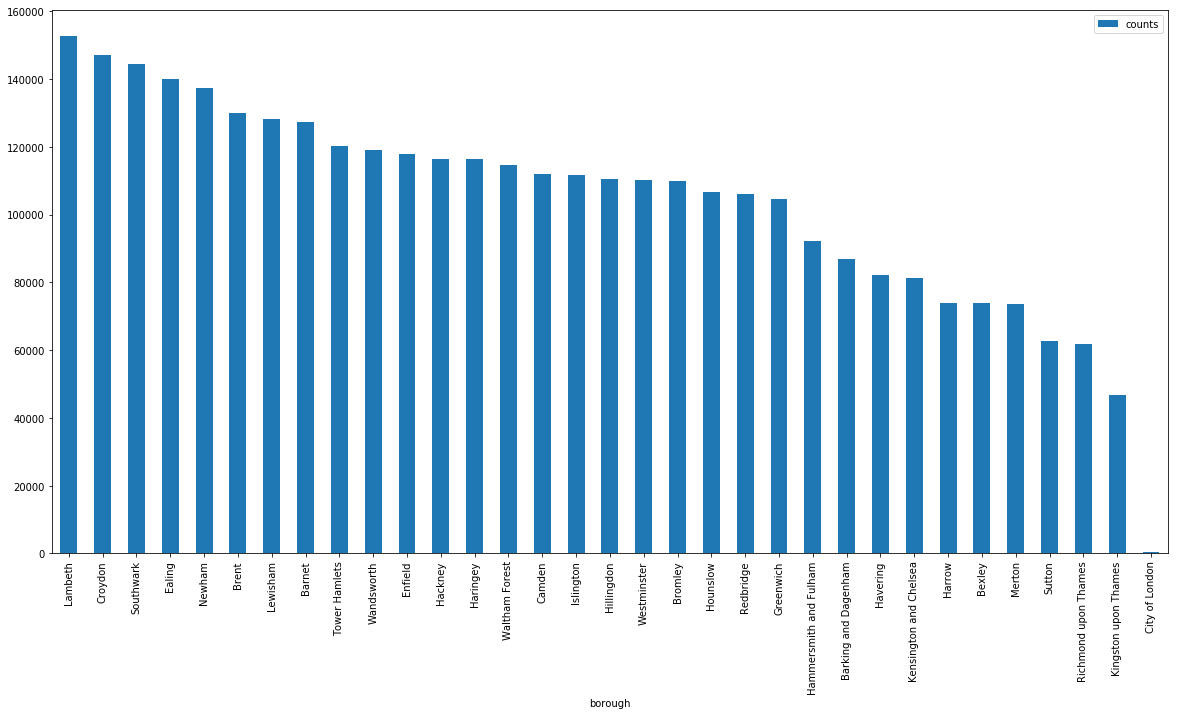

In [13]:
crimeCountByBorough.plot.bar(x='borough',figsize=(20,10), rot=90)

<h3>London outcomes

In [34]:
data=pd.read_csv('data/london-outcomes.csv')
print(len(data))
data=data.dropna()
print(len(data))

1947050
1915110


In [35]:
v=countDistinctValues(data)

In [36]:
v

{'Crime ID': 1446988,
 'Falls within': 2,
 'LSOA code': 5713,
 'LSOA name': 5713,
 'Latitude': 54094,
 'Location': 35095,
 'Longitude': 56873,
 'Month': 36,
 'Outcome type': 23,
 'Reported by': 2}

In [37]:
data=data.drop(['Crime ID', 'LSOA code', 'Latitude', 'Longitude', 'Location', 'Month'], axis=1)

In [38]:
listNamesLSOA=[]
dataLen=len(data)
for value in data['LSOA name']:
    listNamesLSOA.append(value[:-5])

data['lsoaNames']=listNamesLSOA
data=data.drop(['LSOA name'], axis=1)

In [39]:
print(countDistinctValues(data))

{'Reported by': 2, 'Falls within': 2, 'Outcome type': 23, 'lsoaNames': 250}


In [40]:
data.to_csv('cleanedLondonOutcomes.csv', index=None)

<h3>Analysis

In [96]:
data=pd.read_csv('cleanedLondonOutcomes.csv')

In [98]:
data.head()

,Reported by,Falls within,Outcome type,lsoaNames
0,City of London Police,City of London Police,Investigation complete; no suspect identified,City of London
1,City of London Police,City of London Police,Investigation complete; no suspect identified,City of London
2,City of London Police,City of London Police,Formal action is not in the public interest,Tower Hamlets
3,City of London Police,City of London Police,Investigation complete; no suspect identified,City of London
4,City of London Police,City of London Police,Investigation complete; no suspect identified,City of London


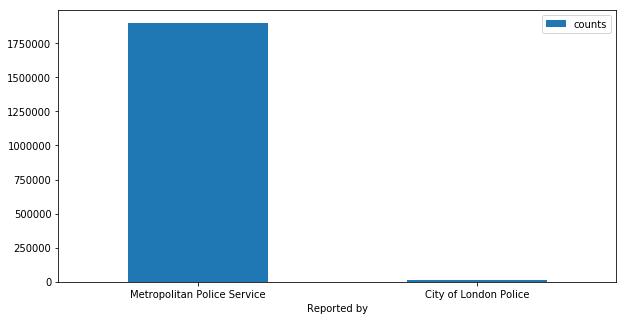

In [99]:
reportedBy = data.groupby(['Reported by']).size().reset_index(name='counts').sort_values('counts',ascending=False)
reportedBy.plot.bar(x='Reported by',figsize=(10,5), rot=0)

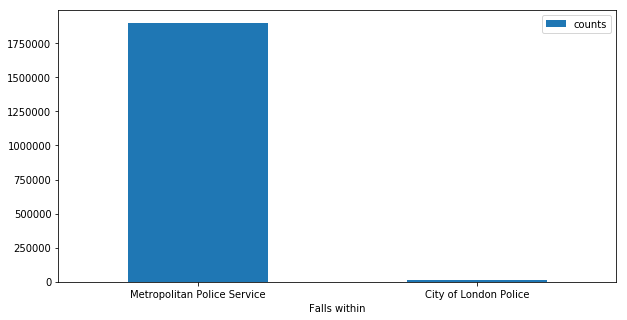

In [100]:
fallsWithin = data.groupby(['Falls within']).size().reset_index(name='counts').sort_values('counts',ascending=False)
fallsWithin.plot.bar(x='Falls within',figsize=(10,5), rot=0)

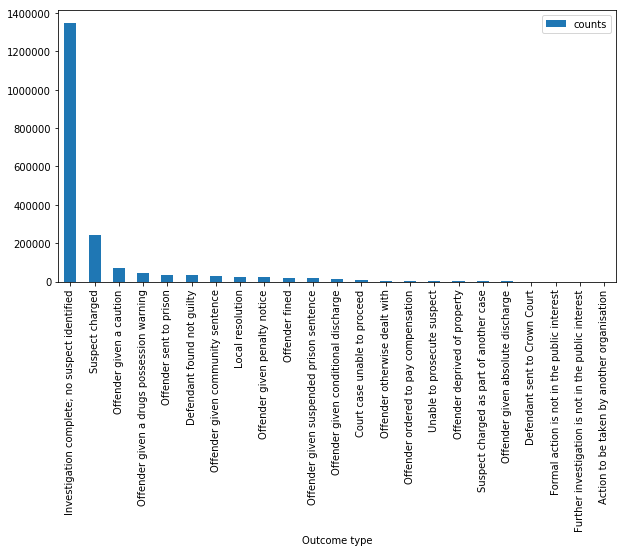

In [102]:
outcomeType = data.groupby(['Outcome type']).size().reset_index(name='counts').sort_values('counts',ascending=False)
outcomeType.plot.bar(x='Outcome type',figsize=(10,5), rot=90)

<h3>London stop and search

<h3>Cleaning

In [5]:
data=pd.read_csv('data/london-stop-and-search.csv')
print(len(data))

302623


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data=data.drop(['Age range', 'Part of a policing operation', 'Policing operation','Self-defined ethnicity', 'Legislation', 'Longitude', 'Latitude', 'Outcome linked to object of search', 'Removal of more than just outer clothing', 'Date'], axis=1)

In [11]:
data=data.dropna()
print(len(data))

213109


In [56]:
data.to_csv('cleanedLondonStopAndSearch.csv', index=False)

<h3>Analysis

In [86]:
data=pd.read_csv('cleanedLondonStopAndSearch.csv')

In [87]:
print(countDistinctValues(data))

{'Type': 3, 'Gender': 3, 'Ethnicity': 5, 'ObjectOfSearch': 9, 'Outcome': 8}


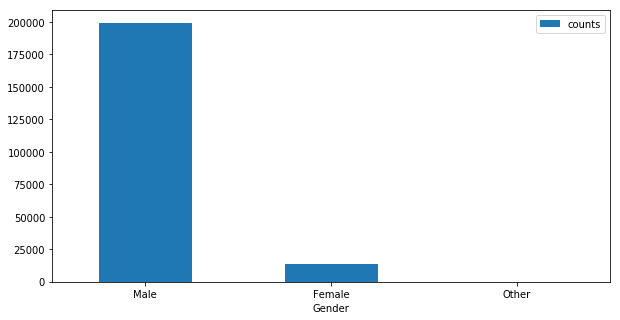

In [88]:
criminalsByGender = data.groupby(['Gender']).size().reset_index(name='counts').sort_values('counts',ascending=False)
criminalsByGender.plot.bar(x='Gender',figsize=(10,5), rot=0)

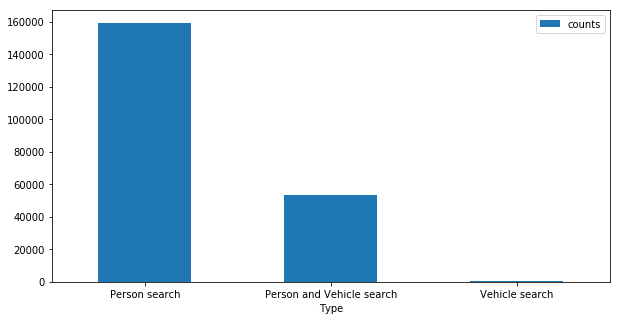

In [95]:
investigationType = data.groupby(['Type']).size().reset_index(name='counts').sort_values('counts',ascending=False)
investigationType.plot.bar(x='Type',figsize=(10,5), rot=0)

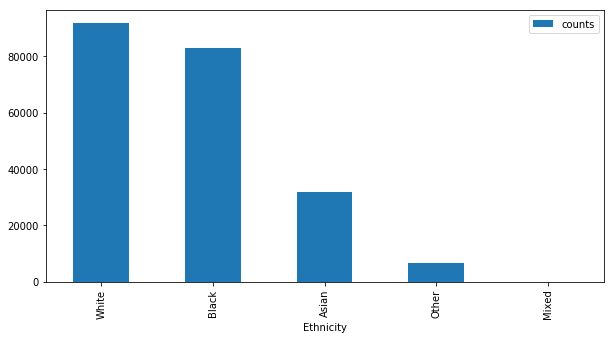

In [90]:
criminalsByEthinicity = data.groupby(['Ethnicity']).size().reset_index(name='counts').sort_values('counts',ascending=False)
criminalsByEthinicity.plot.bar(x='Ethnicity',figsize=(10,5), rot=90)

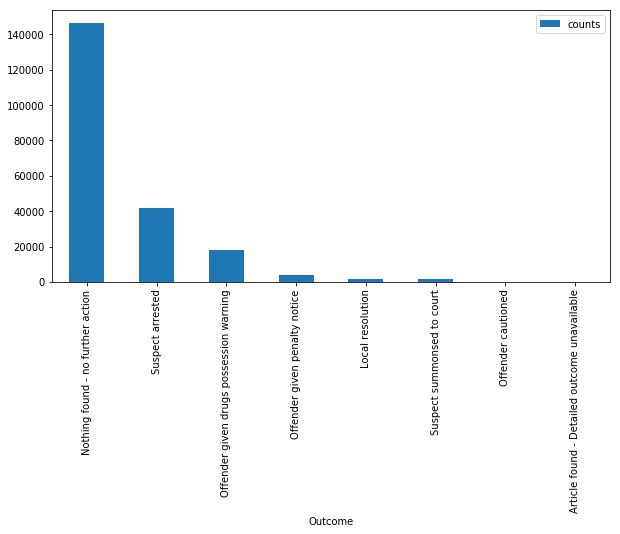

In [92]:
outcomes = data.groupby(['Outcome']).size().reset_index(name='counts').sort_values('counts',ascending=False)
outcomes.plot.bar(x='Outcome',figsize=(10,5), rot=90)

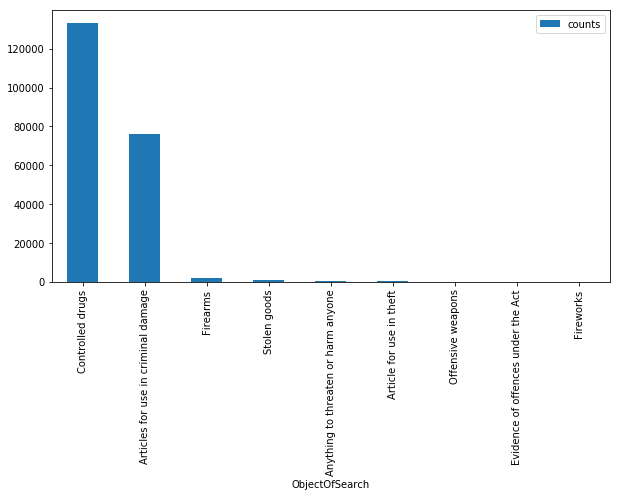

In [93]:
objects = data.groupby(['ObjectOfSearch']).size().reset_index(name='counts').sort_values('counts',ascending=False)
objects.plot.bar(x='ObjectOfSearch',figsize=(10,5), rot=90)

<h3>London street

In [133]:
data=pd.read_csv('data/london-street.csv')
print(len(data))

2946479


In [134]:
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified,NaN
1,62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect,NaN
2,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
3,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
4,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN


In [135]:
print(countDistinctValues(data, ['Location']))

{'Location': 36490}


In [22]:
data=data.drop(['Crime ID', 'Month','Reported by', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'Context'], axis=1)

In [24]:
data=data.dropna()
len(data)

2203912

In [29]:
print(countDistinctValues(data))

{'Falls within': 2, 'Crime type': 13, 'Last outcome category': 26, 'lsoaNames': 312}


#this data is very similar to the first dataset

In [30]:
data.to_csv('cleanedLondonStreet.csv', index=None)

<h3>Analysis

In [104]:
data=pd.read_csv('cleanedLondonStreet.csv')

In [109]:
print(countDistinctValues(data))

{'Falls within': 2, 'Crime type': 13, 'Last outcome category': 26, 'lsoaNames': 312}


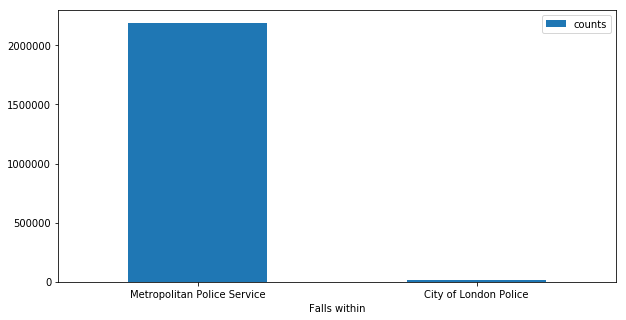

In [106]:
fallsWithin = data.groupby(['Falls within']).size().reset_index(name='counts').sort_values('counts',ascending=False)
fallsWithin.plot.bar(x='Falls within',figsize=(10,5), rot=0)

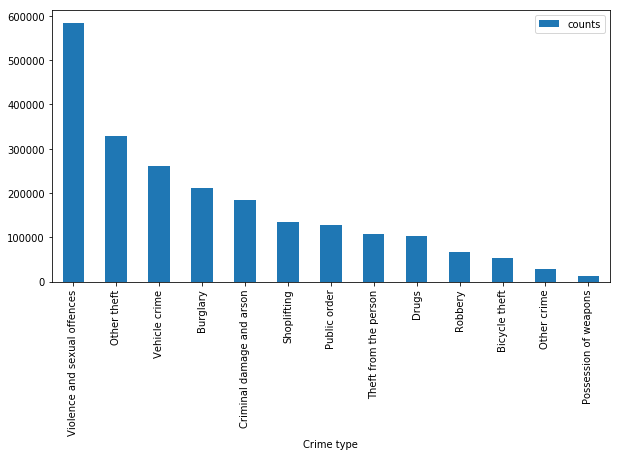

In [108]:
crimeType = data.groupby(['Crime type']).size().reset_index(name='counts').sort_values('counts',ascending=False)
crimeType.plot.bar(x='Crime type',figsize=(10,5), rot=90)